In [1]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("/Users/chira/Downloads/data_clean.csv",index_col=0)

In [3]:
data

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67,5,1,2010,67,S
2,36.0,118.0,8.0,72,5,2,2010,72,C
3,12.0,149.0,12.6,74,5,3,2010,74,PS
4,18.0,313.0,11.5,62,5,4,2010,62,S
5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,67,5,1,2010,67,C
155,30.0,193.0,6.9,70,9,26,2010,70,PS
156,NaN,145.0,13.2,77,9,27,2010,77,S
157,14.0,191.0,14.3,75,9,28,2010,75,S


In [4]:
#Data Structure 
type(data)
data.shape

(158, 9)

In [5]:
#data types
data.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Temp C      object
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

# Data type conversion

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   158 non-null    object 
 4   Month    158 non-null    object 
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 12.3+ KB


## coerce

### coerce will introduce NA values for non numeric data in the columns

In [7]:
data['Month']=pd.to_numeric(data['Month'],errors='coerce')
data['Temp C']=pd.to_numeric(data['Temp C'],errors='coerce')
data['Weather']=data['Weather'].astype('category')
data['Wind']=data['Wind'].astype('int64')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    120 non-null    float64 
 1   Solar.R  151 non-null    float64 
 2   Wind     158 non-null    int64   
 3   Temp C   157 non-null    float64 
 4   Month    157 non-null    float64 
 5   Day      158 non-null    int64   
 6   Year     158 non-null    int64   
 7   Temp     158 non-null    int64   
 8   Weather  155 non-null    category
dtypes: category(1), float64(4), int64(4)
memory usage: 11.4 KB


# Duplicates

In [9]:
#Count of duplicated rows
data[data.duplicated()].shape

(1, 9)

In [10]:
data

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7,67.0,5.0,1,2010,67,S
2,36.0,118.0,8,72.0,5.0,2,2010,72,C
3,12.0,149.0,12,74.0,5.0,3,2010,74,PS
4,18.0,313.0,11,62.0,5.0,4,2010,62,S
5,NaN,NaN,14,56.0,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
154,41.0,190.0,7,67.0,5.0,1,2010,67,C
155,30.0,193.0,6,70.0,9.0,26,2010,70,PS
156,NaN,145.0,13,77.0,9.0,27,2010,77,S
157,14.0,191.0,14,75.0,9.0,28,2010,75,S


In [11]:
data[data.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
157,14.0,191.0,14,75.0,9.0,28,2010,75,S


In [15]:
data_cleaned_1=data.drop_duplicates()

In [17]:
data_cleaned_1.shape

(157, 9)

# DROP columns

In [19]:
data_cleaned_2 = data_cleaned_1.drop('Temp C',axis=1)

In [20]:
data_cleaned_2

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7,5.0,1,2010,67,S
2,36.0,118.0,8,5.0,2,2010,72,C
3,12.0,149.0,12,5.0,3,2010,74,PS
4,18.0,313.0,11,5.0,4,2010,62,S
5,NaN,NaN,14,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.0,223.0,11,9.0,30,2010,68,S
154,41.0,190.0,7,5.0,1,2010,67,C
155,30.0,193.0,6,9.0,26,2010,70,PS
156,NaN,145.0,13,9.0,27,2010,77,S


In [21]:
#rename the Solar Column 

data_cleaned_3 = data_cleaned_2.rename({'Solar.R':'Solar'},axis=1)

In [23]:
data_cleaned_3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7,5.0,1,2010,67,S
2,36.0,118.0,8,5.0,2,2010,72,C
3,12.0,149.0,12,5.0,3,2010,74,PS
4,18.0,313.0,11,5.0,4,2010,62,S
5,NaN,NaN,14,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.0,223.0,11,9.0,30,2010,68,S
154,41.0,190.0,7,5.0,1,2010,67,C
155,30.0,193.0,6,9.0,26,2010,70,PS
156,NaN,145.0,13,9.0,27,2010,77,S


# Outlier Detection

#### histogram of Ozone

<AxesSubplot:>

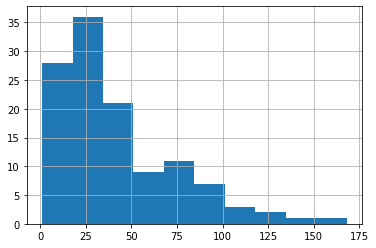

In [26]:
data_cleaned_3['Ozone'].hist()

In [27]:
#Box plot

data_box = data_cleaned_3.dropna()

{'whiskers': [<matplotlib.lines.Line2D at 0x1580f79e460>,
 'caps': [<matplotlib.lines.Line2D at 0x1580f79eb20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1580f79e100>],
 'medians': [<matplotlib.lines.Line2D at 0x1580f7a9220>],
 'fliers': [<matplotlib.lines.Line2D at 0x1580f7a9580>],
 'means': []}

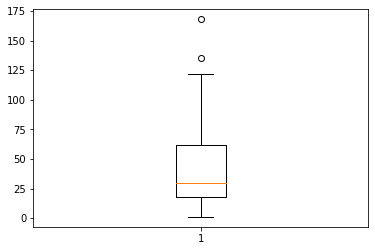

In [28]:
data1_box=data_box.Ozone
plt.boxplot(data1_box)

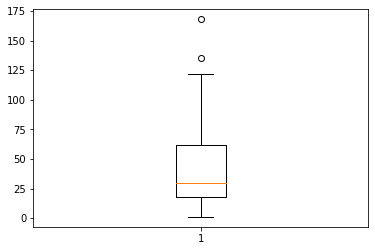

In [29]:
box = plt.boxplot(data1_box)

In [30]:
[item.get_ydata() for item in box['fliers']]

[array([135., 168.])]

In [31]:
[item.get_ydata() for item in box['whiskers']]

[array([18.,  1.]), array([ 62., 122.])]

In [32]:
data_cleaned_2['Ozone'].describe()

count    119.000000
mean      41.815126
std       32.659249
min        1.000000
25%       18.000000
50%       31.000000
75%       62.000000
max      168.000000
Name: Ozone, dtype: float64

# Missing Valeus and Imputation

<AxesSubplot:>

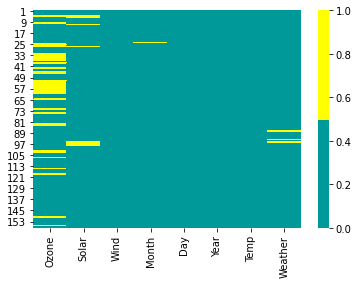

In [37]:
import seaborn as sns

cols = data_cleaned_3.columns
colours = ['#009999','#ffff00']

# colours - Yellow stands for missing and Blue stands for not missing 

sns.heatmap(data_cleaned_3[cols].isnull(),cmap=sns.color_palette(colours))

In [65]:
data_cleaned_3[data_cleaned_3.isnull().any(axis=1)].head(30)

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
5,41.815126,NaN,14,5.0,5,2010,56,S
6,28.000000,NaN,14,5.0,6,2010,66,C
11,7.000000,NaN,6,5.0,11,2010,74,C
24,32.000000,92.0,12,NaN,24,2010,61,C
27,41.815126,NaN,8,5.0,27,2010,57,PS
88,52.000000,82.0,12,7.0,27,2010,86,NaN
94,9.000000,24.0,13,8.0,2,2010,81,NaN
96,78.000000,NaN,6,8.0,4,2010,86,NaN
97,35.000000,NaN,7,8.0,5,2010,85,S
98,66.000000,NaN,4,8.0,6,2010,87,C


In [41]:
data_cleaned_3.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [42]:
#Mean Imputation

mean = data_cleaned_3['Ozone'].mean()

In [43]:
print(mean)

41.81512605042017


In [44]:
data_cleaned_3['Ozone']= data_cleaned_3['Ozone'].fillna(mean)

In [46]:
data_cleaned_3.isnull().sum()

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [49]:
#Missing vlaues imputation for categorical values

obj_columns=data_cleaned_3[['Weather']]
obj_columns

,Weather
1,S
2,C
3,PS
4,S
5,S
...,...
153,S
154,C
155,PS
156,S


In [50]:
obj_columns.isnull().sum()

Weather    3
dtype: int64

In [51]:
obj_columns= obj_columns.fillna(obj_columns.mode().iloc[0])

In [52]:
obj_columns.isnull().sum()

Weather    0
dtype: int64

In [76]:
data_cleaned_3


,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
1,41.000000,190.0,7,5.0,1,2010,67,S
2,36.000000,118.0,8,5.0,2,2010,72,C
3,12.000000,149.0,12,5.0,3,2010,74,PS
4,18.000000,313.0,11,5.0,4,2010,62,S
5,41.815126,NaN,14,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.000000,223.0,11,9.0,30,2010,68,S
154,41.000000,190.0,7,5.0,1,2010,67,C
155,30.000000,193.0,6,9.0,26,2010,70,PS
156,41.815126,145.0,13,9.0,27,2010,77,S


In [77]:
data_cleaned_4  = pd.concat([data_cleaned_3,obj_columns],axis=1)

In [78]:
data_cleaned_4.isnull().sum()

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
Weather    0
dtype: int64

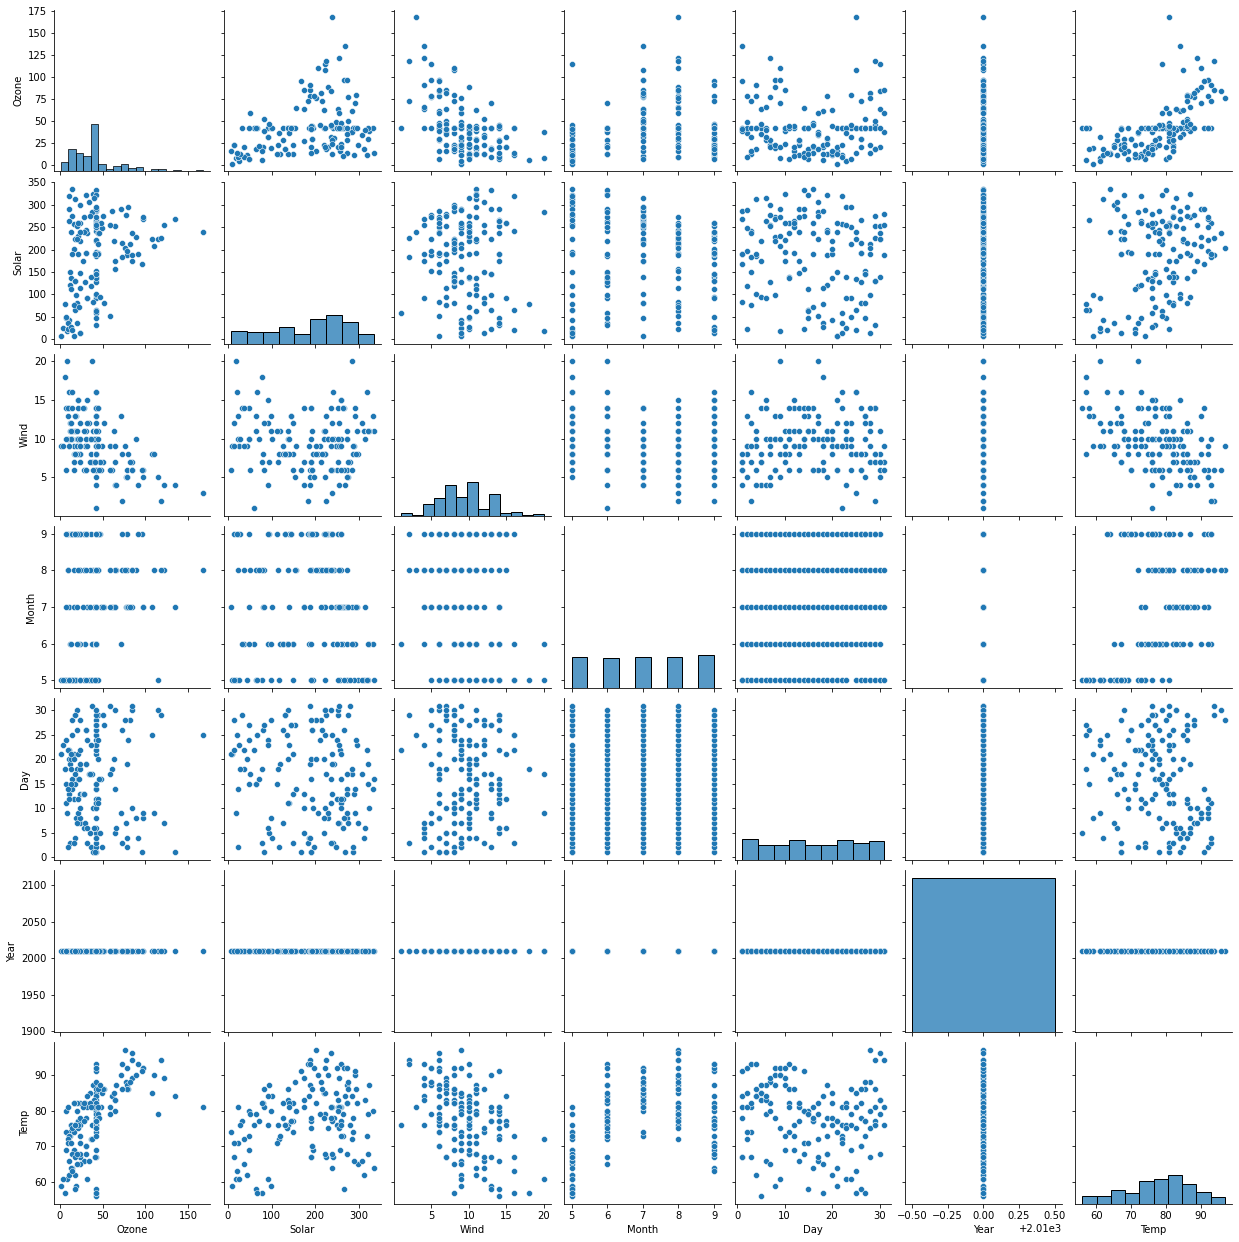

In [58]:
sns.pairplot(data_cleaned_3)

# Transformations

### Dummy variable 

In [79]:
data_cleaned_4

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Weather
1,41.000000,190.0,7,5.0,1,2010,67,S,S
2,36.000000,118.0,8,5.0,2,2010,72,C,C
3,12.000000,149.0,12,5.0,3,2010,74,PS,PS
4,18.000000,313.0,11,5.0,4,2010,62,S,S
5,41.815126,NaN,14,5.0,5,2010,56,S,S
...,...,...,...,...,...,...,...,...,...
153,20.000000,223.0,11,9.0,30,2010,68,S,S
154,41.000000,190.0,7,5.0,1,2010,67,C,C
155,30.000000,193.0,6,9.0,26,2010,70,PS,PS
156,41.815126,145.0,13,9.0,27,2010,77,S,S


In [82]:
# Creating dummy variable for weather column 
data_cleaned_5 = pd.get_dummies(data,columns=['Weather'])

In [83]:
data_cleaned_5

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
1,41.0,190.0,7,67.0,5.0,1,2010,67,0,0,1
2,36.0,118.0,8,72.0,5.0,2,2010,72,1,0,0
3,12.0,149.0,12,74.0,5.0,3,2010,74,0,1,0
4,18.0,313.0,11,62.0,5.0,4,2010,62,0,0,1
5,NaN,NaN,14,56.0,5.0,5,2010,56,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
154,41.0,190.0,7,67.0,5.0,1,2010,67,1,0,0
155,30.0,193.0,6,70.0,9.0,26,2010,70,0,1,0
156,NaN,145.0,13,77.0,9.0,27,2010,77,0,0,1
157,14.0,191.0,14,75.0,9.0,28,2010,75,0,0,1


## Seepd up EDA with Auto EDA

In [84]:
!pip install pandas-profiling==2.7.1

  Attempting uninstall: networkx
    Found existing installation: networkx 2.3
    Uninstalling networkx-2.3:
      Successfully uninstalled networkx-2.3


In [85]:
!pip install sweetviz

In [86]:
import pandas_profiling as pp
import sweetviz as sv

In [87]:
EDA_report = pp.ProfileReport(data)
EDA_report.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\chira\anaconda3\lib\site-packages\pandas_profiling\visualisation\plot.py:166: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [88]:
sweet_report =sv.analyze(data)
sweet_report.show_html('weather_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report weather_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
